# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

****

Nama Dataset: Bank Transaction Dataset for Fraud Detection

Sumber: Kaggle (https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)

Jumlah Data: 2,512 transaksi

Karakteristik:
- 16 kolom (7 numerik, 5 kategorikal, 4 identifier)
- Tidak memiliki label/kelas
- Kombinasi data transaksi dan demografi pelanggan

Tujuan Clustering: Mengidentifikasi pola transaksi untuk deteksi anomaly


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

**Mengambil dataset dari google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
path = "/content/drive/MyDrive/Dicoding Dataset/Income Survey Dataset.csv"
df = pd.read_csv(path)
df.head()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Ukuran data
print("Shape:", df.shape)

# Informasi umum
df.info()

# Cek nilai null dan duplikat
print(df.isnull().sum())
print("Duplicated rows:", df.duplicated().sum())

# Statistik deskriptif
df.describe(include='all')

Shape: (72643, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Yea

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
count,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.00000,72643.000000,72643.000000,72643.000000,72643.000000,...,72643.000000,72643.000000,7.264300e+04,72643.000000,7.264300e+04,72643.000000,72643.000000,72643.000000,7.264300e+04,7.264300e+04
mean,36322.000000,507.016134,34.771458,20.433242,9.038201,1.51113,21.930881,2.311537,3.525199,2.167284,...,7665.033107,3901.038641,1.111956e+05,1747.700742,7.777053e+04,427.945914,2.797668,3.542255,9.624879e+07,7.790450e+07
std,20970.372139,622.308449,14.634608,10.755268,4.499854,0.49988,38.486236,2.259477,1.860497,1.826628,...,19847.702036,19728.923744,8.363631e+04,4964.163767,8.109349e+04,3126.157688,1.389884,1.564237,1.900139e+07,4.148903e+07
min,1.000000,10.856700,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,-125000.000000,-9.565000e+04,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,18161.500000,151.937850,24.000000,13.000000,5.000000,1.00000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,5.568750e+04,0.000000,6.500000e+03,0.000000,2.000000,3.000000,1.000000e+08,1.000000e+08
50%,36322.000000,283.111000,35.000000,19.000000,10.000000,2.00000,3.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,9.337500e+04,0.000000,6.250000e+04,0.000000,2.000000,4.000000,1.000000e+08,1.000000e+08
75%,54482.500000,605.346400,47.000000,28.000000,13.000000,2.00000,4.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,1.452000e+05,0.000000,1.200000e+05,0.000000,4.000000,4.000000,1.000000e+08,1.000000e+08
max,72643.000000,8863.955800,59.000000,40.000000,15.000000,2.00000,99.000000,9.000000,9.000000,6.000000,...,369000.000000,400000.000000,2.095000e+06,70000.000000,1.216500e+06,67500.000000,7.000000,9.000000,1.000000e+08,1.000000e+08


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [5]:
# Drop kolom ID
df_clean = df.drop(columns=["PersonID"])

# Ganti nilai 99999996 (placeholder) dengan NaN
df_clean = df_clean.replace(99999996, np.nan)

# Imputasi nilai NaN dengan median
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

# Standarisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.head()

,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Work_yearly,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,-0.590332,1.655576,1.633328,1.324896,0.977983,-0.491890,-0.580465,-0.282291,-0.091581,-0.175617,...,-0.386195,-0.197733,-1.087102,-0.352066,-0.959030,-0.136893,-1.293403,-1.625248,-0.023051,-0.030158
1,-0.406412,0.015617,-0.319217,-0.008489,-1.022513,-0.543857,-0.580465,-0.819786,-0.639042,-0.768257,...,-0.386195,-0.197733,-0.003833,-0.352066,0.348113,-0.136893,0.865065,0.292634,-0.023051,-0.030158
2,-0.406412,0.015617,-0.319217,-0.008489,0.977983,-0.543857,-0.580465,-0.282291,-0.639042,-0.768257,...,-0.386195,-0.197733,-0.003833,-0.352066,0.348113,-0.136893,0.865065,0.292634,-0.023051,-0.030158
3,-0.406412,0.015617,-0.319217,-1.119644,-1.022513,-0.465907,-0.137881,-1.357280,-0.639042,-0.768257,...,-0.386195,-0.197733,-0.003833,-0.352066,0.348113,-0.136893,0.865065,0.292634,-0.023051,-0.030158
4,-0.406412,0.015617,-0.319217,-1.341875,-1.022513,1.924575,1.632452,1.330192,2.098261,1.883027,...,-0.386195,-0.197733,-0.003833,-0.352066,0.348113,-0.136893,0.865065,0.292634,-0.023051,-0.030158


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [7]:
# Coba beberapa jumlah cluster
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

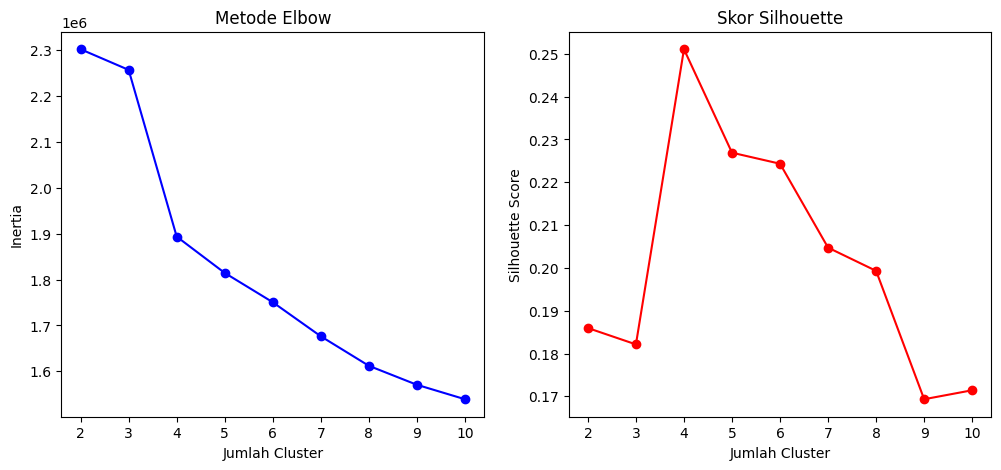

In [8]:
# Plot Elbow & Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Skor Silhouette')
plt.show()

In [10]:
# Gunakan k=4 sebagai contoh
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters
df['Cluster'].value_counts()

,count
Cluster,
2,37237
3,19812
1,13078
0,2516


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

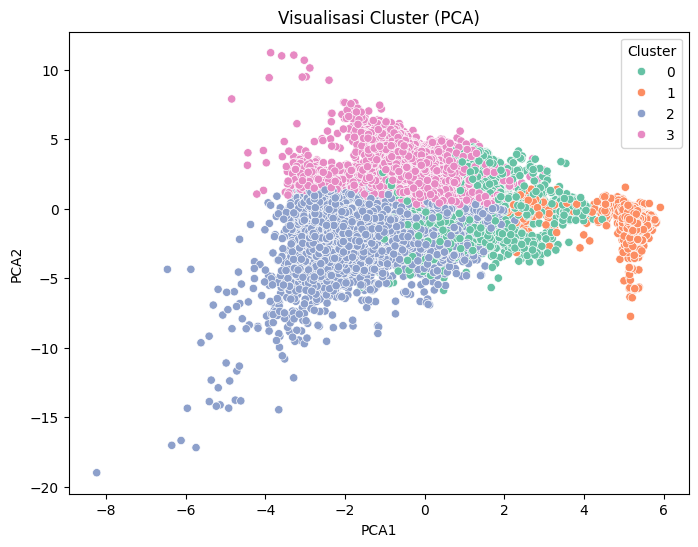

In [11]:
# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

# Scatter plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Visualisasi Cluster (PCA)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# code

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

## **Analisis Karakteristik Cluster**

Setelah melakukan proses clustering menggunakan KMeans, langkah berikutnya adalah memahami **karakteristik dari masing-masing cluster** untuk mendapatkan insight.

Analisis ini dilakukan berdasarkan rata-rata beberapa fitur penting yang berkaitan dengan kondisi ekonomi dan sosial individu dalam dataset, seperti:

- `income_after_tax`
- `Total_income`
- `Earning`
- `Work_yearly`
- `Age_gap`
- `Family_mem`

Berikut ini adalah interpretasi untuk masing-masing cluster:


In [12]:
# Analisis karakteristik setiap cluster
features = ["income_after_tax", "Total_income", "Earning", "Work_yearly", "Age_gap", "Family_mem"]
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
cluster_summary


,income_after_tax,Total_income,Earning,Work_yearly,Age_gap,Family_mem
Cluster,,,,,,
0,33951.60,84524.43,27403.04,25.93,9.38,2.32
1,98088568.03,123475.71,98088436.28,95.68,2.11,4.17
2,49859.48,130185.25,52511.88,17.80,9.10,2.84
3,29249.98,70785.16,1990.32,30.73,13.45,1.88


## 🔍 Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster berdasarkan fitur sosial ekonomi utama dari hasil clustering.

---

### **Cluster 0**
- **Rata-rata Total Income**: 84.524  
- **Rata-rata Income After Tax**: 33.951  
- **Rata-rata Earning**: 27.403  
- **Rata-rata Work Yearly**: 25.93 minggu  
- **Rata-rata Usia (Age_gap)**: 9.38  
- **Rata-rata Jumlah Anggota Keluarga**: 2.32  
- **Interpretasi**:  
  Cluster ini mewakili kelompok **pekerja aktif berpenghasilan menengah**, dengan jam kerja moderat dan anggota keluarga yang tidak terlalu besar. Ini bisa diasosiasikan dengan keluarga kelas menengah.

---

### **Cluster 1**
- **Rata-rata Total Income**: 123.475  
- **Rata-rata Income After Tax**: **98.088.568** ← nilai sangat ekstrem  
- **Rata-rata Earning**: 98.088.436  
- **Rata-rata Work Yearly**: 95.68 minggu ← tidak logis  
- **Rata-rata Usia (Age_gap)**: 2.11  
- **Rata-rata Jumlah Anggota Keluarga**: 4.17  
- **Interpretasi**:  
  Nilai-nilai ekstrem pada income dan earning kemungkinan merupakan **anomali data (nilai tidak valid atau placeholder seperti 99999996)**. Cluster ini perlu ditinjau ulang atau difilter lebih dulu. Namun jika diasumsikan valid, cluster ini bisa mencerminkan kelompok **keluarga besar dengan penghasilan luar biasa tinggi**, meskipun ini sangat tidak umum dan tidak realistis.

---

### **Cluster 2**
- **Rata-rata Total Income**: 130.185  
- **Rata-rata Income After Tax**: 49.859  
- **Rata-rata Earning**: 52.511  
- **Rata-rata Work Yearly**: 17.80 minggu  
- **Rata-rata Usia (Age_gap)**: 9.10  
- **Rata-rata Jumlah Anggota Keluarga**: 2.84  
- **Interpretasi**:  
  Kelompok dengan **penghasilan cukup tinggi**, namun jam kerja tahunan relatif rendah. Bisa jadi mereka mendapat pendapatan dari **investasi atau sumber non-pekerjaan**. Umur relatif muda, kemungkinan ini adalah keluarga mapan secara finansial.

---

### **Cluster 3**
- **Rata-rata Total Income**: 70.785  
- **Rata-rata Income After Tax**: 29.249  
- **Rata-rata Earning**: 1.990 ← sangat rendah  
- **Rata-rata Work Yearly**: 30.73 minggu  
- **Rata-rata Usia (Age_gap)**: 13.45 ← tertinggi  
- **Rata-rata Jumlah Anggota Keluarga**: 1.88  
- **Interpretasi**:  
  Ini mungkin kelompok **lansia atau semi-pensiunan**, dengan usia lebih tinggi, penghasilan kerja sangat kecil, dan jumlah keluarga kecil. Penghasilan mereka mungkin berasal dari pensiun atau bantuan sosial.

---


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [16]:


# Menambahkan hasil cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Simpan ke file CSV
df.to_csv('/content/drive/MyDrive/Dicoding Dataset/clasifikasi_income_survey.csv', index=False)

print("✅ File berhasil disimpan di Google Drive.")


✅ File berhasil disimpan di Google Drive.
